# Daily Female Births case study
The Daily Female Births dataset describes the number of daily female births in California in 1959. The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988). It is available to download here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv.


Load the dataset with pandas directly from its remote repository or download it and place it in your current working directory under the name “daily-total-female-births.csv“.

In [60]:
# I like to keep imports separated
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
# Configure the url
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

# Load the dataset
df = pd.read_csv(url, header=0, index_col="Date", parse_dates=["Date"])

# Set the daily periods for the datetime index
df.index = df.index.to_period("D")

D


To keep things simple, you can use the same grid of ARIMA hyperparameters as in the example case study in the quest.

In [41]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")

Now, write the code to grid search ARIMA parameters on the Daily Female Births dataset.

First, write a function "*evaluate_arima_model(X, arima_order)*" where X is the dataset and arima_order the ARIMA model's parameters order. This function returns the Root Mean Square Error for the model

In [42]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):

	# Initialize the model
	model = ARIMA(X, order=arima_order)

	# Fit the model
	model_fit = model.fit()

	# In-sample prediction
	y_pred = model_fit.predict()

	# Calculate and return MSE
	mse = mean_squared_error(y_pred, X)
	return mse

# Simple test:
print(evaluate_arima_model(df, (2,0,1)))

# 49.00964266077298

# Wow, that's quite good result, actually better from whatever is below as "target solution"

49.00964266077298


Now, write a function "*evaluate_models(dataset, p_values, d_values, q_values)*" that assesses your ARIMA model for different combinations of p, d and q values on *dataset*.
This function uses the *evaluate_arima_model(X, arima_order)* function to compute the rmse of the ARIMA model for each combination of parameters.
It prints the ARIMA parameters and mean squared error for each configuration successfully evaluated.
**The best mean parameters are reported as ARIMA(6, 1, 0) with a mean squared error of 53.187.**

The final results should look like this:

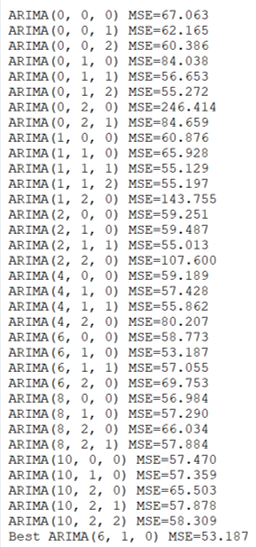

In [47]:
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):

	# Three nested loops (p,d,q)
	for p in p_values:
		for d in d_values:
			for q in q_values:

				# Calculate MSE of current combination
				cur_mse = evaluate_arima_model(dataset, (p,d,q))

				# Output
				print(f"ARIMA{(p, d, q)} MSE={cur_mse}")
				
				# Simple check if we already have a best_mse
				try:
					best_mse = best_mse * 1
				
				# In case of error (no best_mse defined) ...
				except:
					# We take cur_mse and current combination as best for now
					best_mse = cur_mse
					best_param = (p,d,q)

				# In case of no error, we do usual minimum finding
				else:	
					if  cur_mse < best_mse:
						best_param = (p,d,q)
						best_mse   = cur_mse
	
	# Now we have best parameters and MSE, so we print them out 
	print(f"Best ARIMA{best_param} MSE={best_mse}")

In [48]:
evaluate_models(df, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=53.84894726968137
ARIMA(0, 0, 1) MSE=51.78791173954894
ARIMA(0, 0, 2) MSE=51.026774327559146
ARIMA(0, 1, 0) MSE=87.34794520547945
ARIMA(0, 1, 1) MSE=53.32999997618388
ARIMA(0, 1, 2) MSE=52.727206961604736
ARIMA(0, 2, 0) MSE=250.1022975056701
ARIMA(0, 2, 1) MSE=90.05428999358695
ARIMA(0, 2, 2) MSE=56.36519998617178
ARIMA(1, 0, 0) MSE=51.2992726791492
ARIMA(1, 0, 1) MSE=49.63346264638694
ARIMA(1, 0, 2) MSE=49.06947679216688
ARIMA(1, 1, 0) MSE=69.36157971698577
ARIMA(1, 1, 1) MSE=52.664160846114925
ARIMA(1, 1, 2) MSE=52.57890330308661
ARIMA(1, 2, 0) MSE=144.94237756086002
ARIMA(1, 2, 1) MSE=71.72189125521714
ARIMA(1, 2, 2) MSE=55.78215233750907
ARIMA(2, 0, 0) MSE=50.64123327566356
ARIMA(2, 0, 1) MSE=49.00964266077298
ARIMA(2, 0, 2) MSE=48.95213010202821
ARIMA(2, 1, 0) MSE=63.93990795649132
ARIMA(2, 1, 1) MSE=52.57037143987508
ARIMA(2, 1, 2) MSE=52.570339123491344
ARIMA(2, 2, 0) MSE=113.33333623000347
ARIMA(2, 2, 1) MSE=66.32615900310597
ARIMA(2, 2, 2) MSE=1897425938.278

In [52]:
# I NEED TO SEE (some selected models)
model = ARIMA(df, order=(10,0,2))
y_pred_10_0_2 = model.fit().predict()

model = ARIMA(df, order=(8,0,1))
y_pred_8_0_1 = model.fit().predict()

model = ARIMA(df, order=(6,0,2))
y_pred_6_0_2 = model.fit().predict()

model = ARIMA(df, order=(1,0,2))
y_pred_1_0_2 = model.fit().predict()

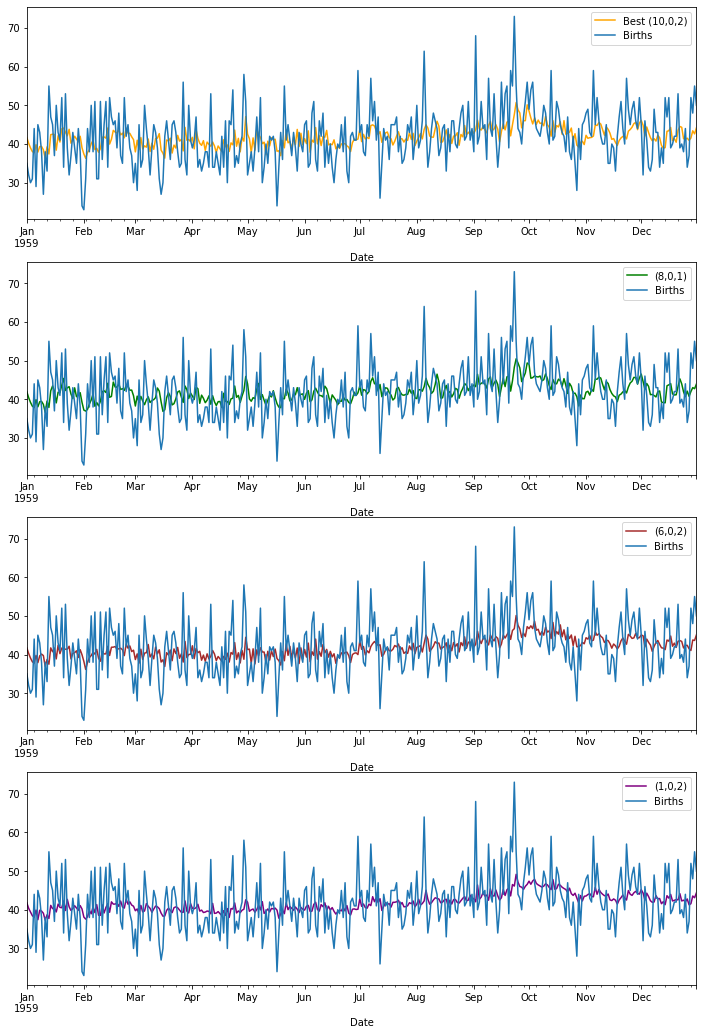

In [58]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(12,18))


y_pred_10_0_2.plot(ax=axs[0], color="orange", label="Best (10,0,2)")
y_pred_8_0_1.plot(ax=axs[1], color="green", label="(8,0,1)")
y_pred_6_0_2.plot(ax=axs[2], color="brown", label="(6,0,2)")
y_pred_1_0_2.plot(ax=axs[3], color="purple", label="(1,0,2)")

for ax in axs:
    df.plot(ax=ax, label="Female Births")
    ax.legend()

plt.show()

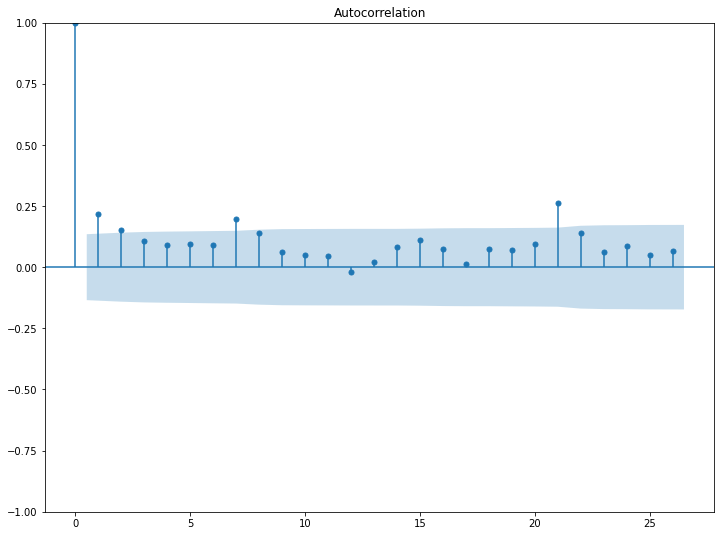

In [63]:
# Well, there might be some seasonality in weeks?

fig, ax = plt.subplots(figsize=(12,9))

plot_acf(df, ax=ax, alpha=0.01)
plt.show()


In [ ]:
# Summary:

# I wonder why there aren't all combinations of the p, d, q in the "target solution".
# The best combination seems to be (10, 0, 2) with MSE = 48.11 (rounded)

# Why were these combinations left out??

# Also, it'd be interesting to run this with weekly seasonality as autocorrelation suggests
# some interesting intervals (7 days, 21 days)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>